# Scraping from bayut

### Import the libaries

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import re
import time

In [2]:
base_url2 = 'https://www.bayut.om/en/oman/properties-for-sale/'
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/138.0.0.0 Safari/537.36 Edg/138.0.0.0'
}  

In [3]:
response = requests.get(base_url2, headers = headers) # to do request to the link
print(f"Starting to scrape from: {base_url2}")

page_url = base_url2

Starting to scrape from: https://www.bayut.om/en/oman/properties-for-sale/


In [4]:
property_info = {
    'title': [],
    'price': [],
    'location': [],
    'rooms': [],
    'size': []
}

page_url = base_url2
previous_url = ''

# Loop through pages
while True:
    print(f"Scraping: {page_url}")
    try:
        result = requests.get(page_url, headers=headers)
        result.raise_for_status()
    except requests.exceptions.RequestException as err:
        print(f"Error fetching page {page_url}: {err}")
        break

    parsed = BeautifulSoup(result.content, 'html.parser')

    listings = parsed.find_all('div', class_='_475e888a')

    for item in listings:
        # Title
        title_elem = item.find('span', class_='_19e94678 e0abc2de')
        title_text = title_elem.text.strip() if title_elem else 'not available'
        property_info['title'].append(title_text)

        # Price
        price_elem = item.find('span', class_='dc381b54')
        price_text = price_elem.text.strip() if price_elem else 'not available'
        property_info['price'].append(price_text)

        # Location
        loc_elem = item.find('h3', class_='_4402bd70')
        loc_text = loc_elem.text.strip() if loc_elem else 'not available'
        property_info['location'].append(loc_text)

        # Rooms
        room_elem = item.find('span', attrs={'aria-label': 'Beds'})
        room_text = room_elem.text.strip() if room_elem else 'not available'
        property_info['rooms'].append(room_text)

        # Size
        size_elem = item.find('h4', class_='cfac7e1b _85ddb82f')
        size_text = size_elem.text.strip() if size_elem else 'not available'
        property_info['size'].append(size_text)

    
    next_link = parsed.find('a', class_='_95dd93c1', attrs={'title': 'Next'}, href=True)
    if next_link:
        next_page_url  = next_link['href']
        full_next = requests.compat.urljoin(base_url2, next_page_url)

        if full_next == previous_url:
            print("Same page detected. Stopping.")
            break

        previous_url = full_next
        page_url = full_next
        time.sleep(1)
    else:
        print("No next page found. Scraping complete.")
        break

# Export to CSV
df = pd.DataFrame(property_info)
df.to_csv('bayut_oman_properties_for_sale.csv', index=False)
print("Saved to 'bayut_oman_properties_for_sale.csv'")

Scraping: https://www.bayut.om/en/oman/properties-for-sale/
Scraping: https://www.bayut.om/en/oman/properties-for-sale/page-2/
Scraping: https://www.bayut.om/en/oman/properties-for-sale/page-3/
Scraping: https://www.bayut.om/en/oman/properties-for-sale/page-4/
Scraping: https://www.bayut.om/en/oman/properties-for-sale/page-5/
Scraping: https://www.bayut.om/en/oman/properties-for-sale/page-6/
Scraping: https://www.bayut.om/en/oman/properties-for-sale/page-7/
Scraping: https://www.bayut.om/en/oman/properties-for-sale/page-8/
Scraping: https://www.bayut.om/en/oman/properties-for-sale/page-9/
Scraping: https://www.bayut.om/en/oman/properties-for-sale/page-10/
Scraping: https://www.bayut.om/en/oman/properties-for-sale/page-11/
Scraping: https://www.bayut.om/en/oman/properties-for-sale/page-12/
Scraping: https://www.bayut.om/en/oman/properties-for-sale/page-13/
Scraping: https://www.bayut.om/en/oman/properties-for-sale/page-14/
Scraping: https://www.bayut.om/en/oman/properties-for-sale/page-

In [5]:
df = pd.DataFrame(property_info)
df

,title,price,location,rooms,size
0,Villa,"1,200","Al Buraimi, Al Buraimi",5,"1,500 Sq. M."
1,Villa,"1,500","Qantab, Muscat",5,"1,500 Sq. M."
2,Apartment,"1,200","Mahut, Al Wusta",3,"1,000 Sq. M."
3,Villa,"1,500","Al Sifah, Muscat",5,"1,000 Sq. M."
4,Villa,"1,000","Hamra, Al Dakhiliya",4,"1,000 Sq. M."
...,...,...,...,...,...
1804,Villa,"1,000","Haima, Al Wusta",4,"1,000 Sq. M."
1805,Apartment,600,"Mahut, Al Wusta",1,10 Sq. M.
1806,Residential Land,"5,800","Nizwa, Al Dakhiliya",not available,600 Sq. M.
1807,Villa,"491,410","Yiti, Muscat",4,384 Sq. M.


In [39]:
df = pd.read_csv('bayut_oman_properties_for_sale.csv')
df

,title,price,location,rooms,size
0,Villa,"1,200","Al Buraimi, Al Buraimi",5,"1,500 Sq. M."
1,Villa,"1,500","Qantab, Muscat",5,"1,500 Sq. M."
2,Apartment,"1,200","Mahut, Al Wusta",3,"1,000 Sq. M."
3,Villa,"1,500","Al Sifah, Muscat",5,"1,000 Sq. M."
4,Villa,"1,000","Hamra, Al Dakhiliya",4,"1,000 Sq. M."
...,...,...,...,...,...
1804,Villa,"1,000","Haima, Al Wusta",4,"1,000 Sq. M."
1805,Apartment,600,"Mahut, Al Wusta",1,10 Sq. M.
1806,Residential Land,"5,800","Nizwa, Al Dakhiliya",not available,600 Sq. M.
1807,Villa,"491,410","Yiti, Muscat",4,384 Sq. M.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1809 entries, 0 to 1808
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     1809 non-null   object
 1   price     1809 non-null   object
 2   location  1809 non-null   object
 3   rooms     1809 non-null   object
 4   size      1809 non-null   object
dtypes: object(5)
memory usage: 70.8+ KB


In [6]:
df.tail(60)

,title,price,location,rooms,size
1749,Villa,"60,000","Ruwi, Muscat",6,219 Sq. M.
1750,Villa,"52,000","Barka, Al Batinah",4,254 Sq. M.
1751,Residential Land,"73,000","Qurayyat, Muscat",not available,"1,885 Sq. M."
1752,Apartment,"26,500","Al Seeb, Muscat",2,86 Sq. M.
1753,Apartment,"45,000","Al Ghubrah, Muscat",2,110 Sq. M.
1754,Residential Land,"25,000","Sumail, Al Dakhiliya",not available,600 Sq. M.
1755,Residential Land,"67,000","Al Seeb, Muscat",not available,673 Sq. M.
1756,Residential Land,"150,000","Qurayyat, Muscat",not available,"1,500 Sq. M."
1757,Residential Land,"17,900","Al Amarat, Muscat",not available,627 Sq. M.
1758,Residential Land,"20,000","Ibri, Al Dhahirah",not available,799 Sq. M.


In [7]:
df.describe()

,title,price,location,rooms,size
count,1809,1809,1809,1809,1809
unique,4,636,77,13,600
top,Apartment,"85,000","The Wave (Almouj), Muscat",not available,600 Sq. M.
freq,660,27,215,589,194


In [8]:
df.dtypes

title       object
price       object
location    object
rooms       object
size        object
dtype: object

In [9]:
df.shape

(1809, 5)

In [10]:
df.columns

Index(['title', 'price', 'location', 'rooms', 'size'], dtype='object')

<Axes: xlabel='title'>

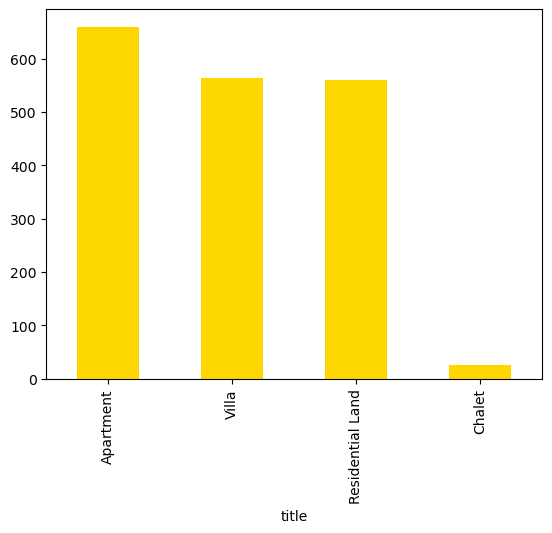

In [11]:
import matplotlib.pyplot as plt
df['title'].value_counts().plot.bar(color = 'gold')

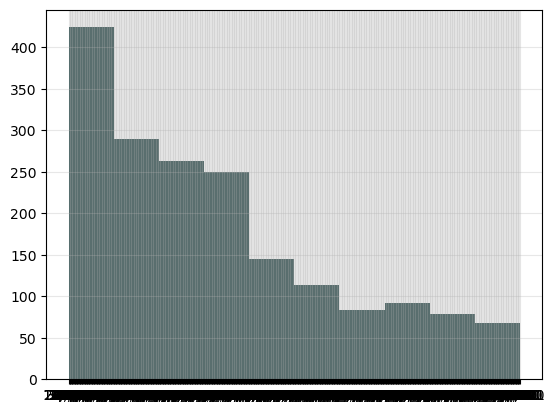

In [12]:
df['price'].hist(color = 'darkslategrey')
plt.grid(alpha=0.3)
plt.show()

## Cleaning Data

In [40]:
df.isnull()

,title,price,location,rooms,size
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
1804,False,False,False,False,False
1805,False,False,False,False,False
1806,False,False,False,False,False
1807,False,False,False,False,False


In [41]:
df.head(60)

,title,price,location,rooms,size
0,Villa,"1,200","Al Buraimi, Al Buraimi",5,"1,500 Sq. M."
1,Villa,"1,500","Qantab, Muscat",5,"1,500 Sq. M."
2,Apartment,"1,200","Mahut, Al Wusta",3,"1,000 Sq. M."
3,Villa,"1,500","Al Sifah, Muscat",5,"1,000 Sq. M."
4,Villa,"1,000","Hamra, Al Dakhiliya",4,"1,000 Sq. M."
5,Apartment,"120,000","Al Sinainah, Al Buraimi",3,110 Sq. M.
6,Apartment,"100,000","Al Duqum, Al Wusta",2,100 Sq. M.
7,Apartment,"220,000","Al Duqum, Al Wusta",3,100 Sq. M.
8,Apartment,"220,000","Taqah, Dhofar",2,112 Sq. M.
9,Apartment,"22,000","Muqshin, Dhofar",2,112 Sq. M.


In [42]:
df.isnull().sum()

title       0
price       0
location    0
rooms       0
size        0
dtype: int64

In [43]:
df.replace('not available', np.nan, inplace=True)

In [44]:
df.isnull().sum()

title         0
price         0
location      0
rooms       589
size          0
dtype: int64

In [45]:
#fill the missing value
df.fillna('some default value', inplace=True)

In [46]:
df.isnull().sum()

title       0
price       0
location    0
rooms       0
size        0
dtype: int64

In [47]:
df.dtypes

title       object
price       object
location    object
rooms       object
size        object
dtype: object

In [48]:
df['rooms'] = pd.to_numeric(df['rooms'], errors='coerce')

In [49]:
df.dtypes

title        object
price        object
location     object
rooms       float64
size         object
dtype: object

In [50]:
df.head()

,title,price,location,rooms,size
0,Villa,"1,200","Al Buraimi, Al Buraimi",5.0,"1,500 Sq. M."
1,Villa,"1,500","Qantab, Muscat",5.0,"1,500 Sq. M."
2,Apartment,"1,200","Mahut, Al Wusta",3.0,"1,000 Sq. M."
3,Villa,"1,500","Al Sifah, Muscat",5.0,"1,000 Sq. M."
4,Villa,"1,000","Hamra, Al Dakhiliya",4.0,"1,000 Sq. M."


In [51]:
df['size'].unique()[:20]

array(['1,500 Sq. M.', '1,000 Sq. M.', '110 Sq. M.', '100 Sq. M.',
       '112 Sq. M.', '471 Sq. M.', '132 Sq. M.', '363 Sq. M.',
       '345 Sq. M.', '502 Sq. M.', '420 Sq. M.', '650 Sq. M.',
       '160 Sq. M.', '265 Sq. M.', '260 Sq. M.', '107 Sq. M.',
       '70 Sq. M.', '149 Sq. M.', '120 Sq. M.', '769 Sq. M.'],
      dtype=object)

In [52]:
#Remove non-numeric characters(sq, m,)
df['size'] = df['size'].str.extract('(\d+\.?\d*)') # extracts numeric part as string
df['size'] = pd.to_numeric(df['size'], errors='coerce') # convert it to float

In [53]:
df.dtypes

title        object
price        object
location     object
rooms       float64
size          int64
dtype: object

In [55]:
#Clean the 'price' column
df['price'] = df['price'].astype(str).str.replace(r'[^\d.]', '', regex=True)

#Convert to float first
df['price'] = pd.to_numeric(df['price'], errors='coerce')

#Convert to nullable integer
df['price'] = df['price'].astype('Int64') 

In [56]:
df.dtypes

title        object
price         Int64
location     object
rooms       float64
size          int64
dtype: object

In [57]:
df['size'].isnull().sum()

np.int64(0)

In [58]:
df.head()

,title,price,location,rooms,size
0,Villa,1200,"Al Buraimi, Al Buraimi",5.0,1
1,Villa,1500,"Qantab, Muscat",5.0,1
2,Apartment,1200,"Mahut, Al Wusta",3.0,1
3,Villa,1500,"Al Sifah, Muscat",5.0,1
4,Villa,1000,"Hamra, Al Dakhiliya",4.0,1


In [59]:
# convet DataFrame to csv file
df.to_csv('cleaned_bayut.csv', index=False)